In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

### Splitting the data

In [ ]:
# Split the data into train, validation and test sets
# Save the data into .csv files

# read the data
df = pd.read_csv('train.csv')

# split the data into train, validation and test sets to be 80%, 10% and 10% respectively of the total data size
train, validation, test = np.split(df.sample(frac=1), [int(.8*len(df)), int(.9*len(df))])

# save the data into .csv files

train.to_csv('train_split.csv', index=False)
validation.to_csv('validation_split.csv', index=False)
test.to_csv('test_split.csv', index=False)


### Distribution of variables

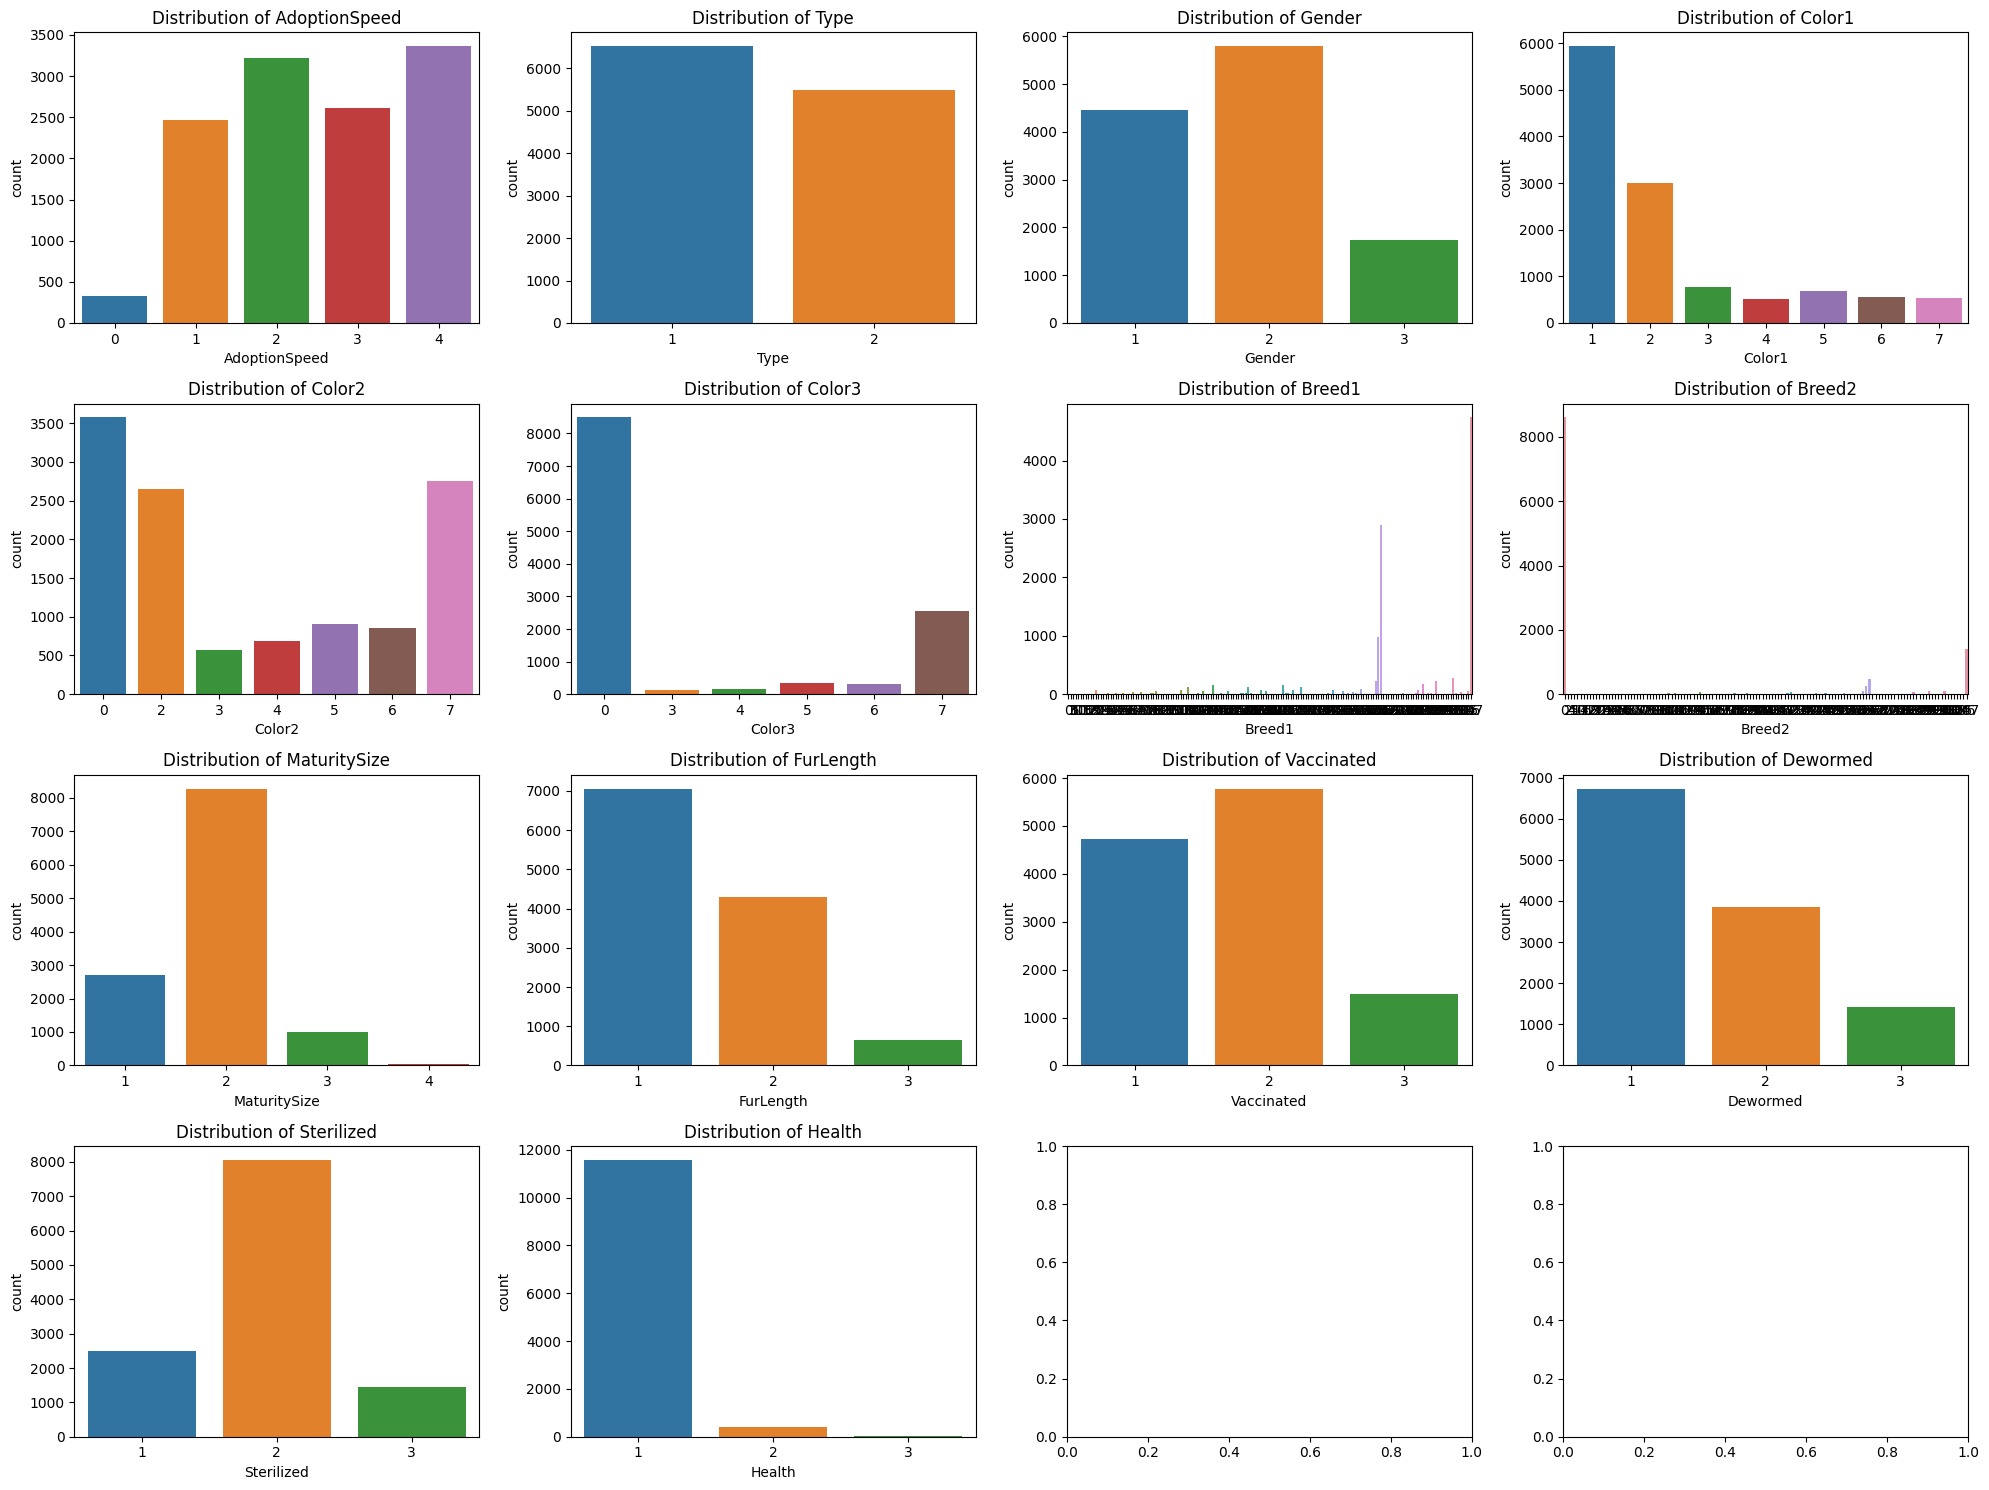

In [ ]:
# Load the dataset
df = pd.read_csv('train_split.csv')

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
axes = axes.flatten()

# Visualize the distribution of the target variable
sns.countplot(x='AdoptionSpeed', data=df, ax=axes[0])
axes[0].set_title('Distribution of AdoptionSpeed')

# Visualize the distribution of categorical variables
categorical_cols = ['Type', 'Gender', 'Color1', 'Color2', 'Color3','Breed1',
                    'Breed2','MaturitySize','FurLength','Vaccinated','Dewormed'
                    ,'Sterilized','Health']
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i+1])
    axes[i+1].set_title(f'Distribution of {col}')

# Adjust the layout and show the plot
fig.tight_layout()
plt.show()

### Deal with imbalancing

In [ ]:
# Classes are not balanced (class 0 in the AdoptionSpeed column has very low count with the perspective of other classes). 
# Use ROMC method to deal with class imbalance.

from imblearn.over_sampling import RandomOverSampler

# read the data
df = pd.read_csv('train_split.csv')

# split the train into features(X_train) and target(y_train)
X_train, y_train = df.drop('AdoptionSpeed', axis=1), df['AdoptionSpeed']

# apply ROMC (Random Oversampling Minority Class)
# Unlike SMOTE, ROMC does not require converting non-numeric features to numeric values.
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# save the data into .csv files
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)

# combine the features and target into one dataframe
df = pd.concat([X_train, y_train], axis=1)

# save the data into .csv files
df.to_csv('train_balanced.csv', index=False)


### Distribution of variables after balancing

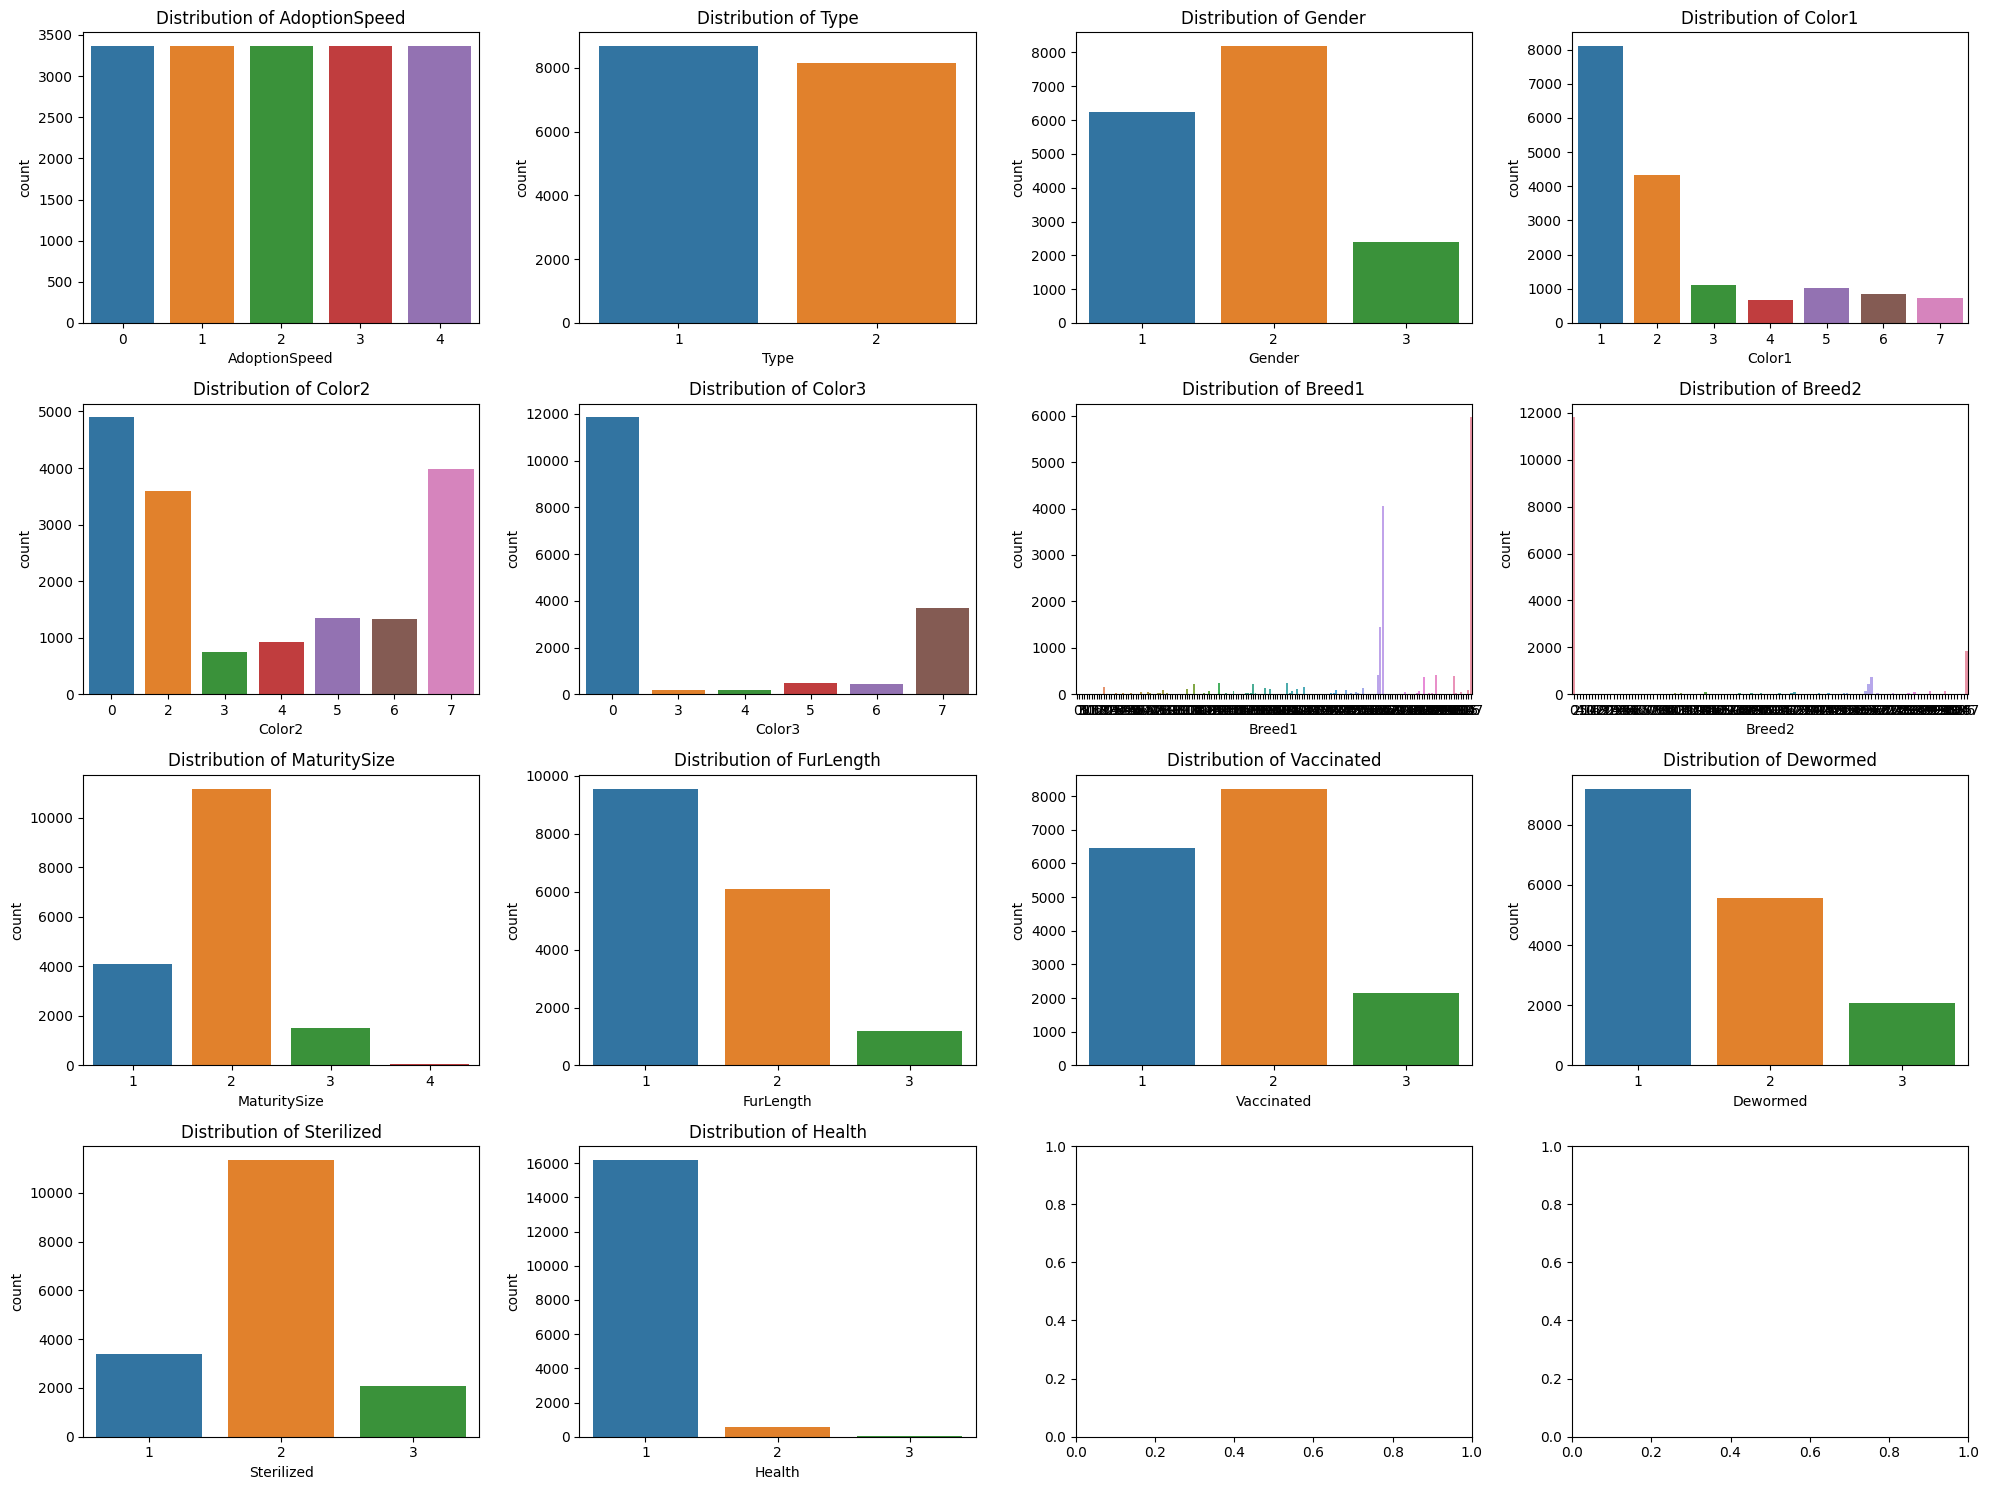

In [ ]:
# Load the dataset
df = pd.read_csv('train_balanced.csv')

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
axes = axes.flatten()

# Visualize the distribution of the target variable
sns.countplot(x='AdoptionSpeed', data=df, ax=axes[0])
axes[0].set_title('Distribution of AdoptionSpeed')

# Visualize the distribution of categorical variables
categorical_cols = ['Type', 'Gender', 'Color1', 'Color2', 'Color3','Breed1',
                    'Breed2','MaturitySize','FurLength','Vaccinated','Dewormed'
                    ,'Sterilized','Health']
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i+1])
    axes[i+1].set_title(f'Distribution of {col}')

# Adjust the layout and show the plot
fig.tight_layout()
plt.show()

### Show variables with boxplot to see outliers

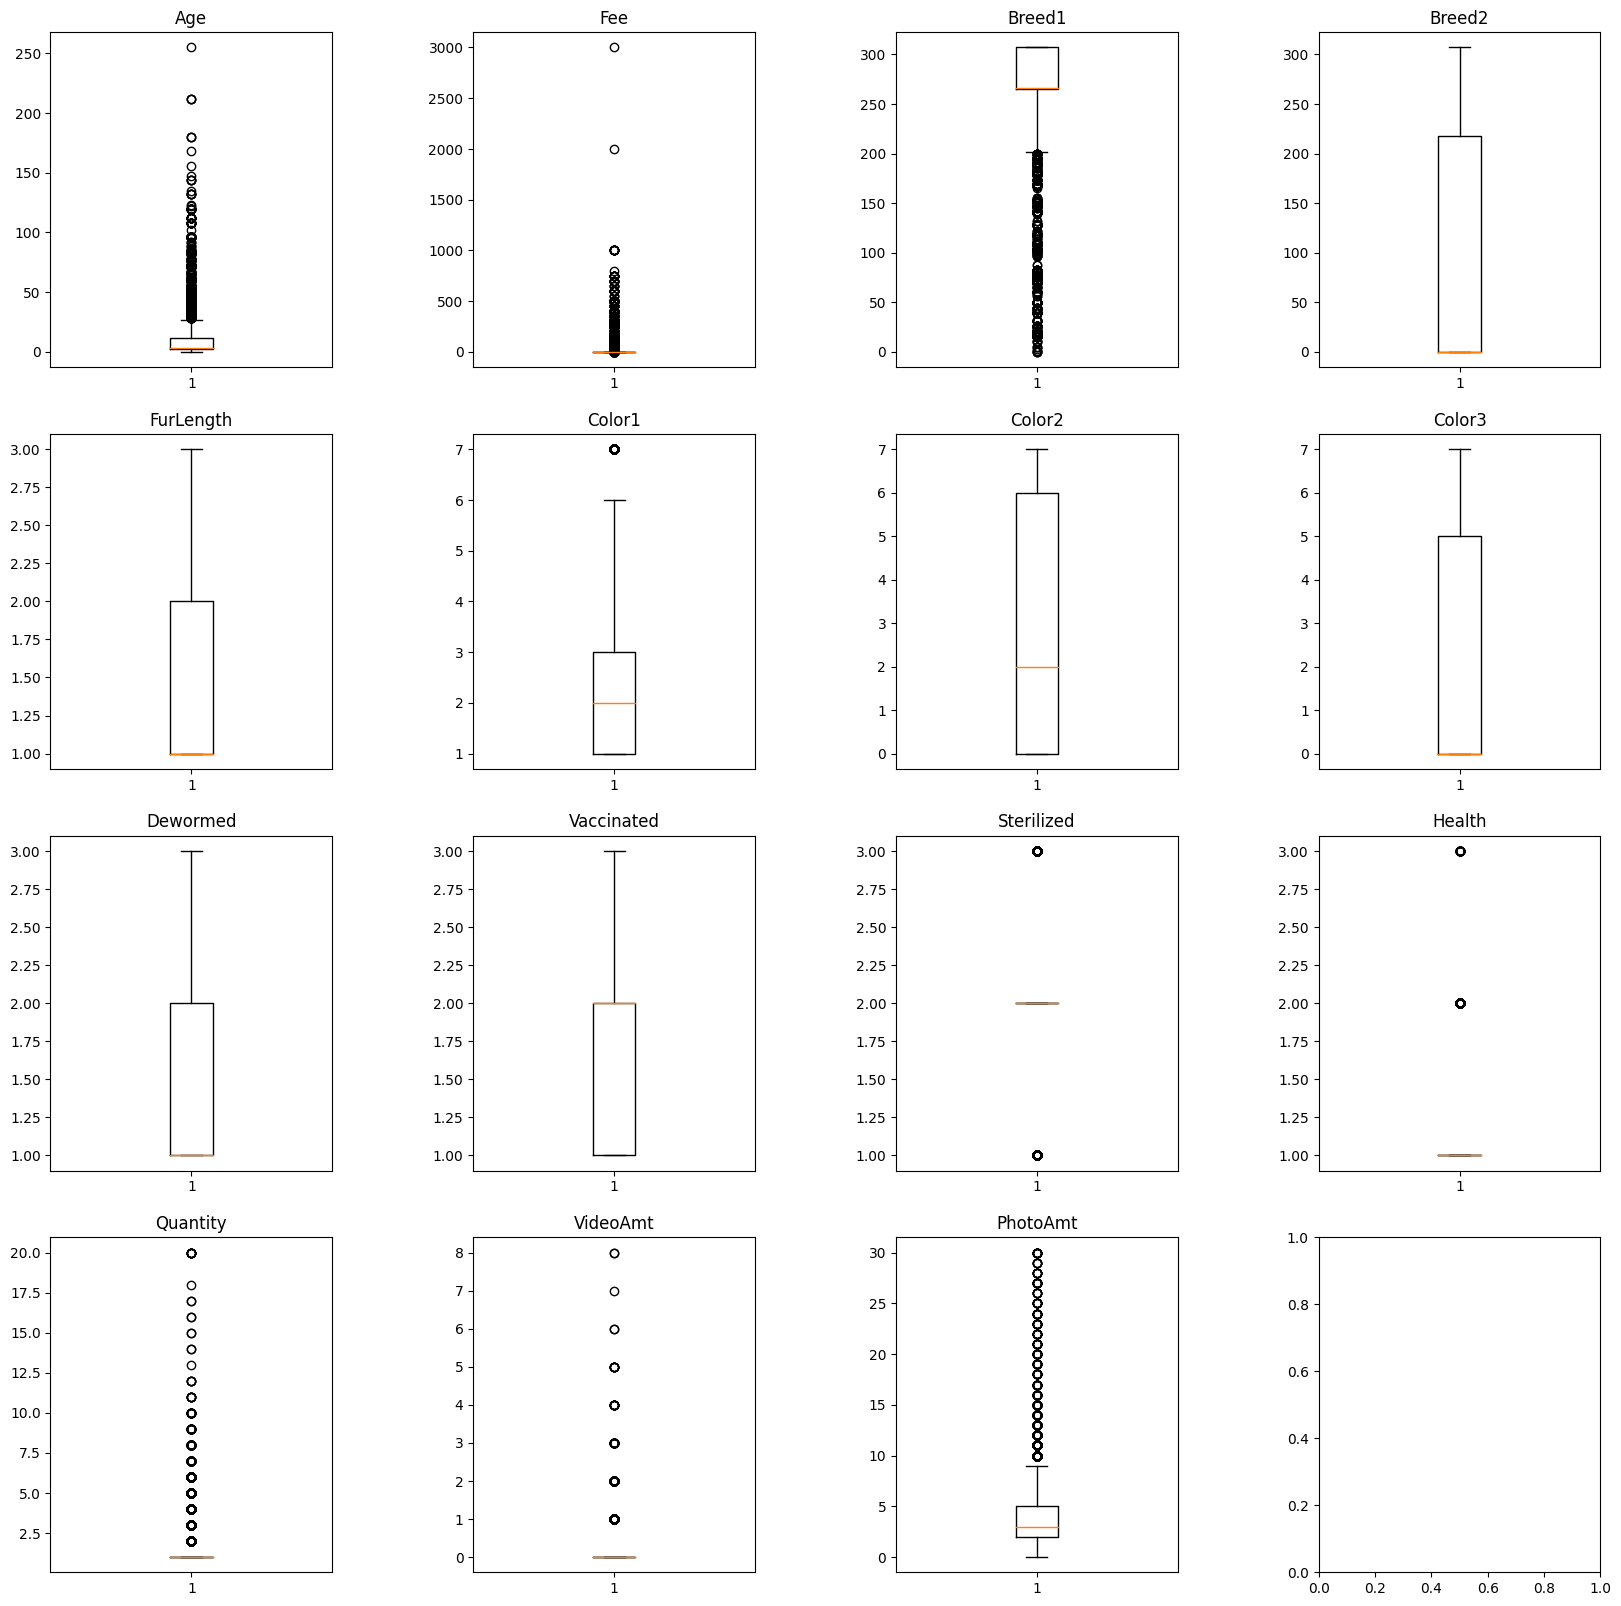

In [ ]:
# Load the dataset
df = pd.read_csv('X_train.csv')

# Define the list of columns to plot
columns = ['Age', 'Fee', 'Breed1', 'Breed2', 'FurLength', 'Color1', 'Color2', 'Color3', 'Dewormed', 'Vaccinated', 'Sterilized', 'Health', 'Quantity', 'VideoAmt', 'PhotoAmt']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Iterate through the columns and plot the boxplots
for col, ax in zip(columns, axes.flatten()):
    ax.boxplot(df[col])
    ax.set_title(col)

# Adjust the layout and show the plot
fig.subplots_adjust(wspace=0.5)
plt.show()

### Use log transformation for outliers

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


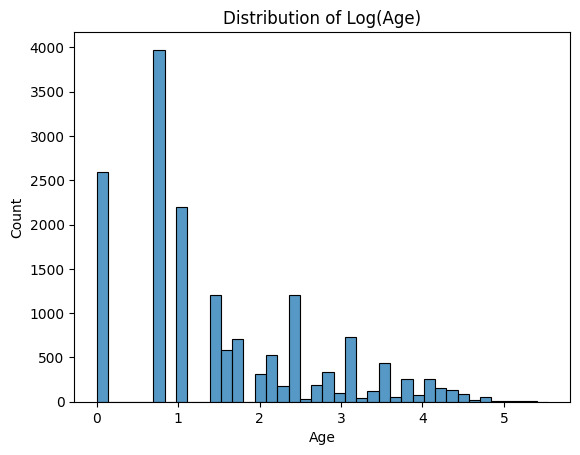

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


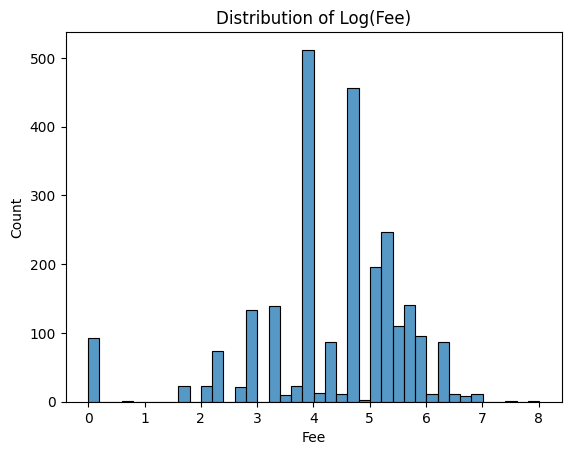

In [ ]:
# From previous plots, we can see that the variables Age and Fee have outliers.
# We will remove the outliers using the IQR method. 

# Load the dataset
df = pd.read_csv('train_balanced.csv')

# Age
# Apply log transformation to the Age variable
df['Age'] = np.log(df['Age'])

# Visualize the distribution of the transformed variable
sns.histplot(x='Age', data=df)
plt.title('Distribution of Log(Age)')
plt.show()

# show boxplot of the transformed variable
sns.boxplot(x='Age', data=df)
plt.title('Boxplot of Log(Age)')
plt.show()

# Fee
# Apply log transformation to the Fee variable
df['Fee'] = np.log(df['Fee'])

# Visualize the distribution of the transformed variable
sns.histplot(x='Fee', data=df)
plt.title('Distribution of Log(Fee)')
plt.show()

# show boxplot of the transformed variable
sns.boxplot(x='Fee', data=df)
plt.title('Boxplot of Log(Age)')
plt.show()

# convert -inf to 0
df = df.replace([-np.inf], 0)

# save the data into .csv files
df.to_csv('train_balanced_log.csv', index=False)

### Correlation between all columns and the target variable

<ipython-input-12-eff3d62ad494>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr()['AdoptionSpeed'][df.dtypes[df.dtypes != 'object'].index].sort_values(ascending=False))
<ipython-input-12-eff3d62ad494>:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()['AdoptionSpeed'].sort_values()


AdoptionSpeed    1.000000
Breed1           0.122105
Age              0.109786
Quantity         0.061665
MaturitySize     0.049492
Gender           0.041707
PhotoAmt         0.029924
Fee              0.019091
Health          -0.004020
VideoAmt        -0.004534
State           -0.010041
Color3          -0.018919
Dewormed        -0.049423
Breed2          -0.051438
Color1          -0.052747
Vaccinated      -0.060477
Color2          -0.067106
Sterilized      -0.086094
FurLength       -0.132443
Type            -0.141996
Name: AdoptionSpeed, dtype: float64


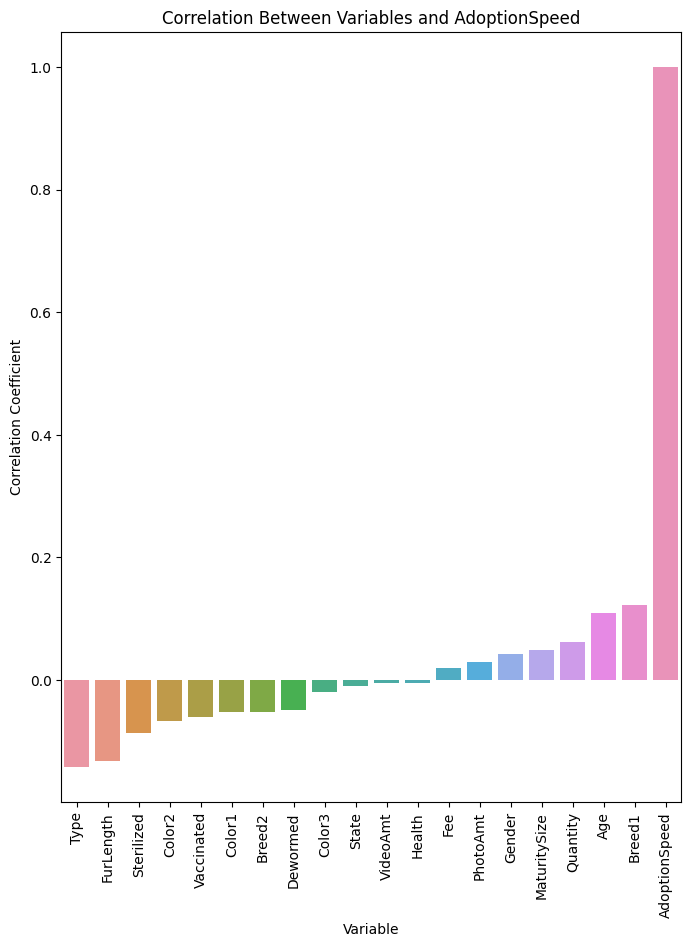

<ipython-input-12-eff3d62ad494>:41: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


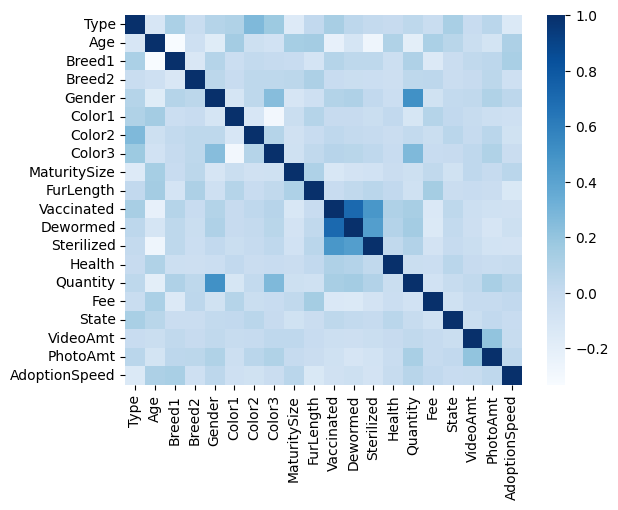

In [ ]:
# Correlation between features and target variable (AdoptionSpeed) 
# Correlation between features and target variable can be used to select the most important features that have the highest correlation with the target variable 
# and remove the features that have low correlation with the target variable to reduce the dimensionality of the dataset and improve the model's performance 

# read the data
df = pd.read_csv('train_balanced_log.csv')

# print correlation of quantitative features with the target variable
print(df.corr()['AdoptionSpeed'][df.dtypes[df.dtypes != 'object'].index].sort_values(ascending=False))

# # Calculate the correlation coefficient between each variable and the target variable
# corr = df.corr()['AdoptionSpeed'].sort_values()

# # Visualize the correlation coefficients
# plt.figure(figsize=(8, 10))

# # draw barplot of correlation coefficients
# corr.plot(kind='barh', color='blue')

# # add title and axis labels
# plt.title('Correlation Coefficients')
# plt.xlabel('Coefficient Value')
# plt.ylabel('Feature')

# # show the plot
# plt.show()

# Calculate the correlation coefficient between each variable and the target variable
corr = df.corr()['AdoptionSpeed'].sort_values()

# Visualize the correlation coefficients
plt.figure(figsize=(8, 10))
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Between Variables and AdoptionSpeed')
plt.show()

# show correlation matrix
corr_matrix = df.corr() 
sns.heatmap(corr_matrix, cmap='Blues')
plt.show()

# correlation values:
# above 0: positive correlation (as one feature increases, the other feature increases)
# below 0: negative correlation (as one feature increases, the other feature decreases)
# 0: no correlation (as one feature increases, the other feature does not change)

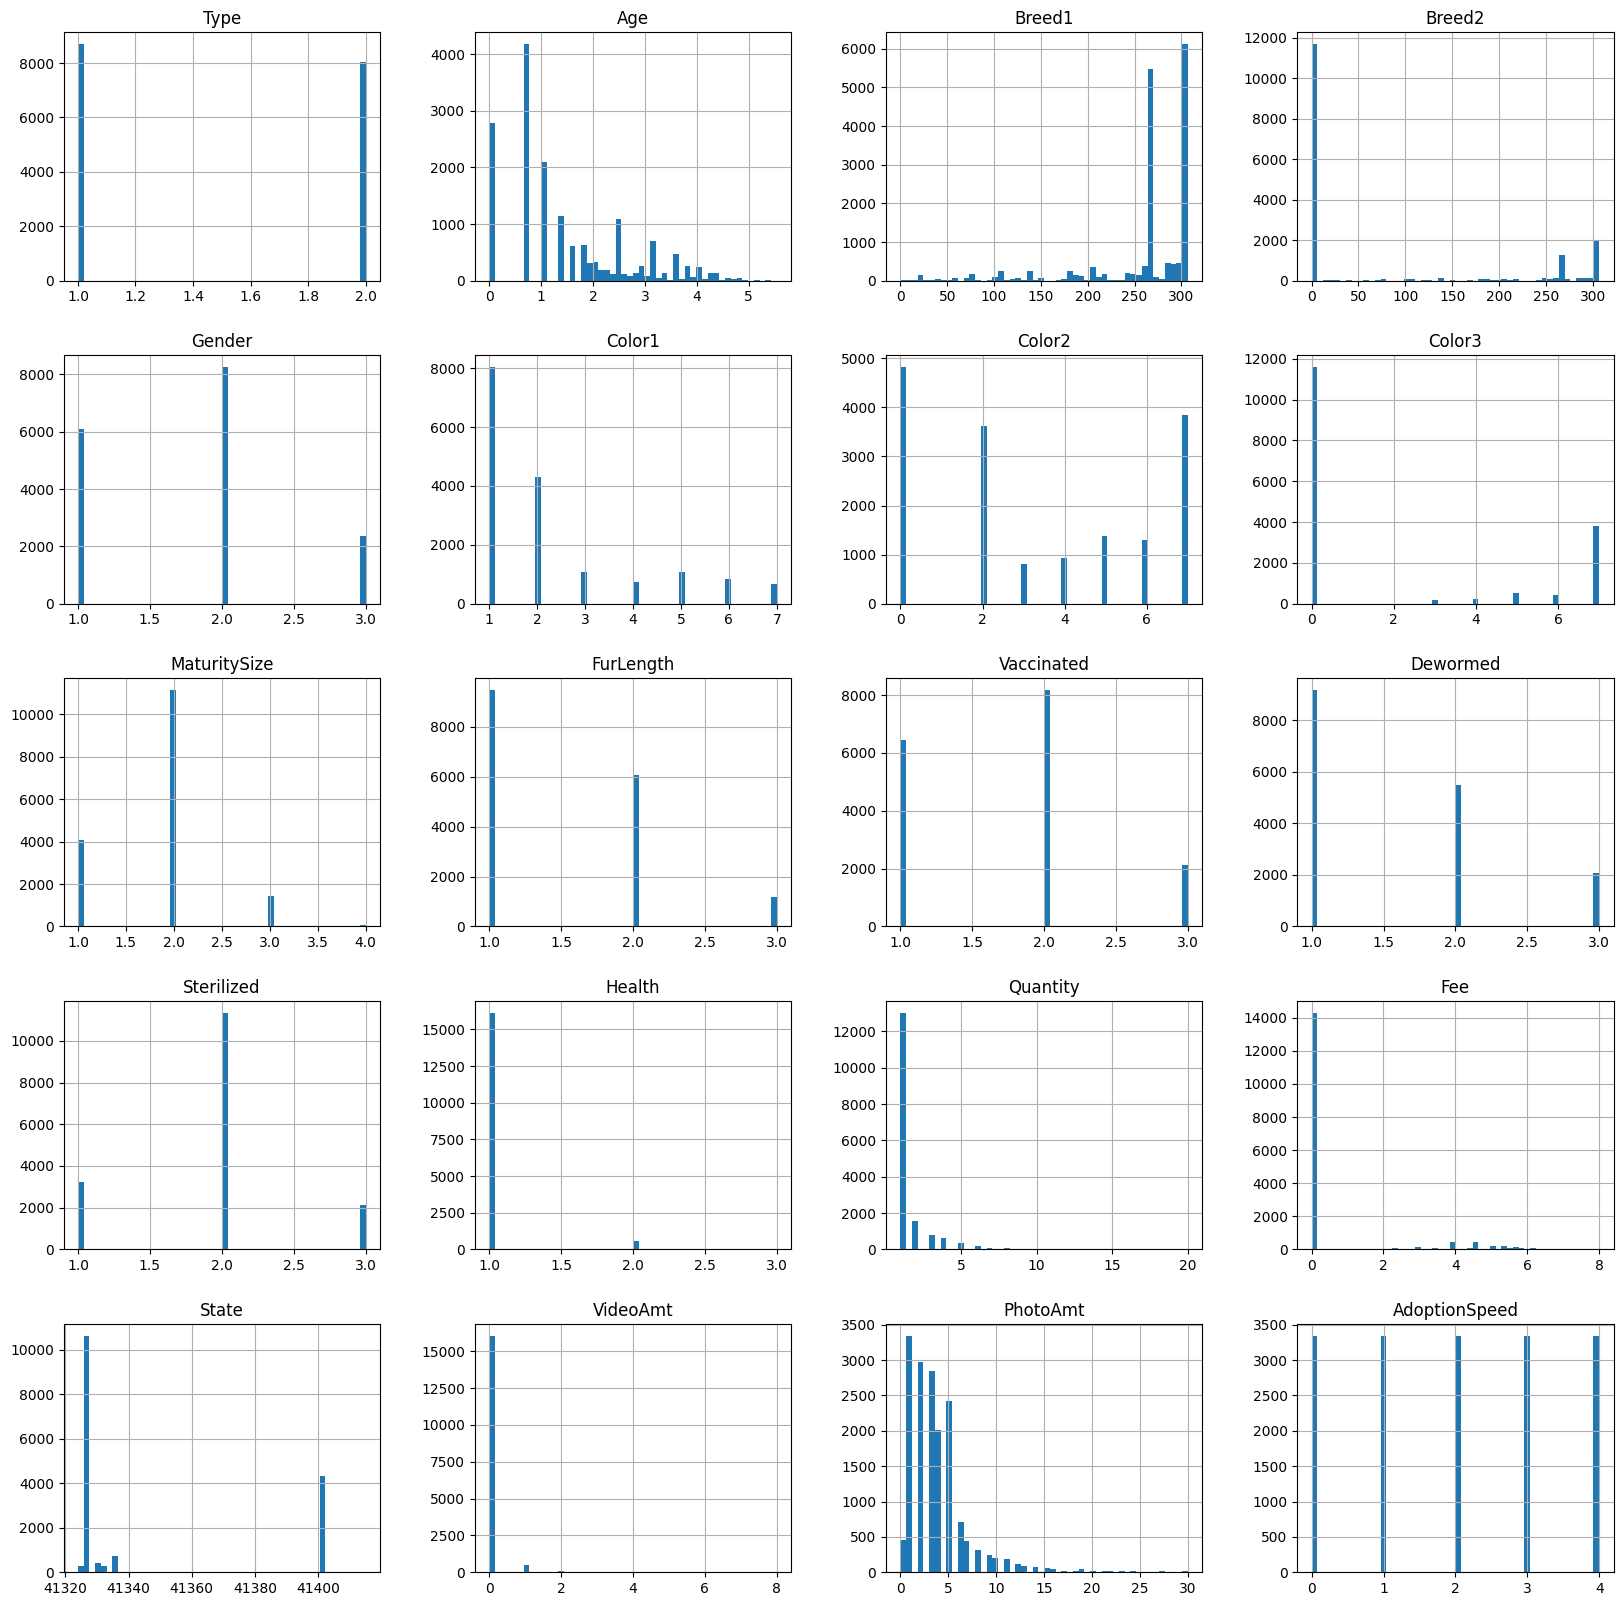

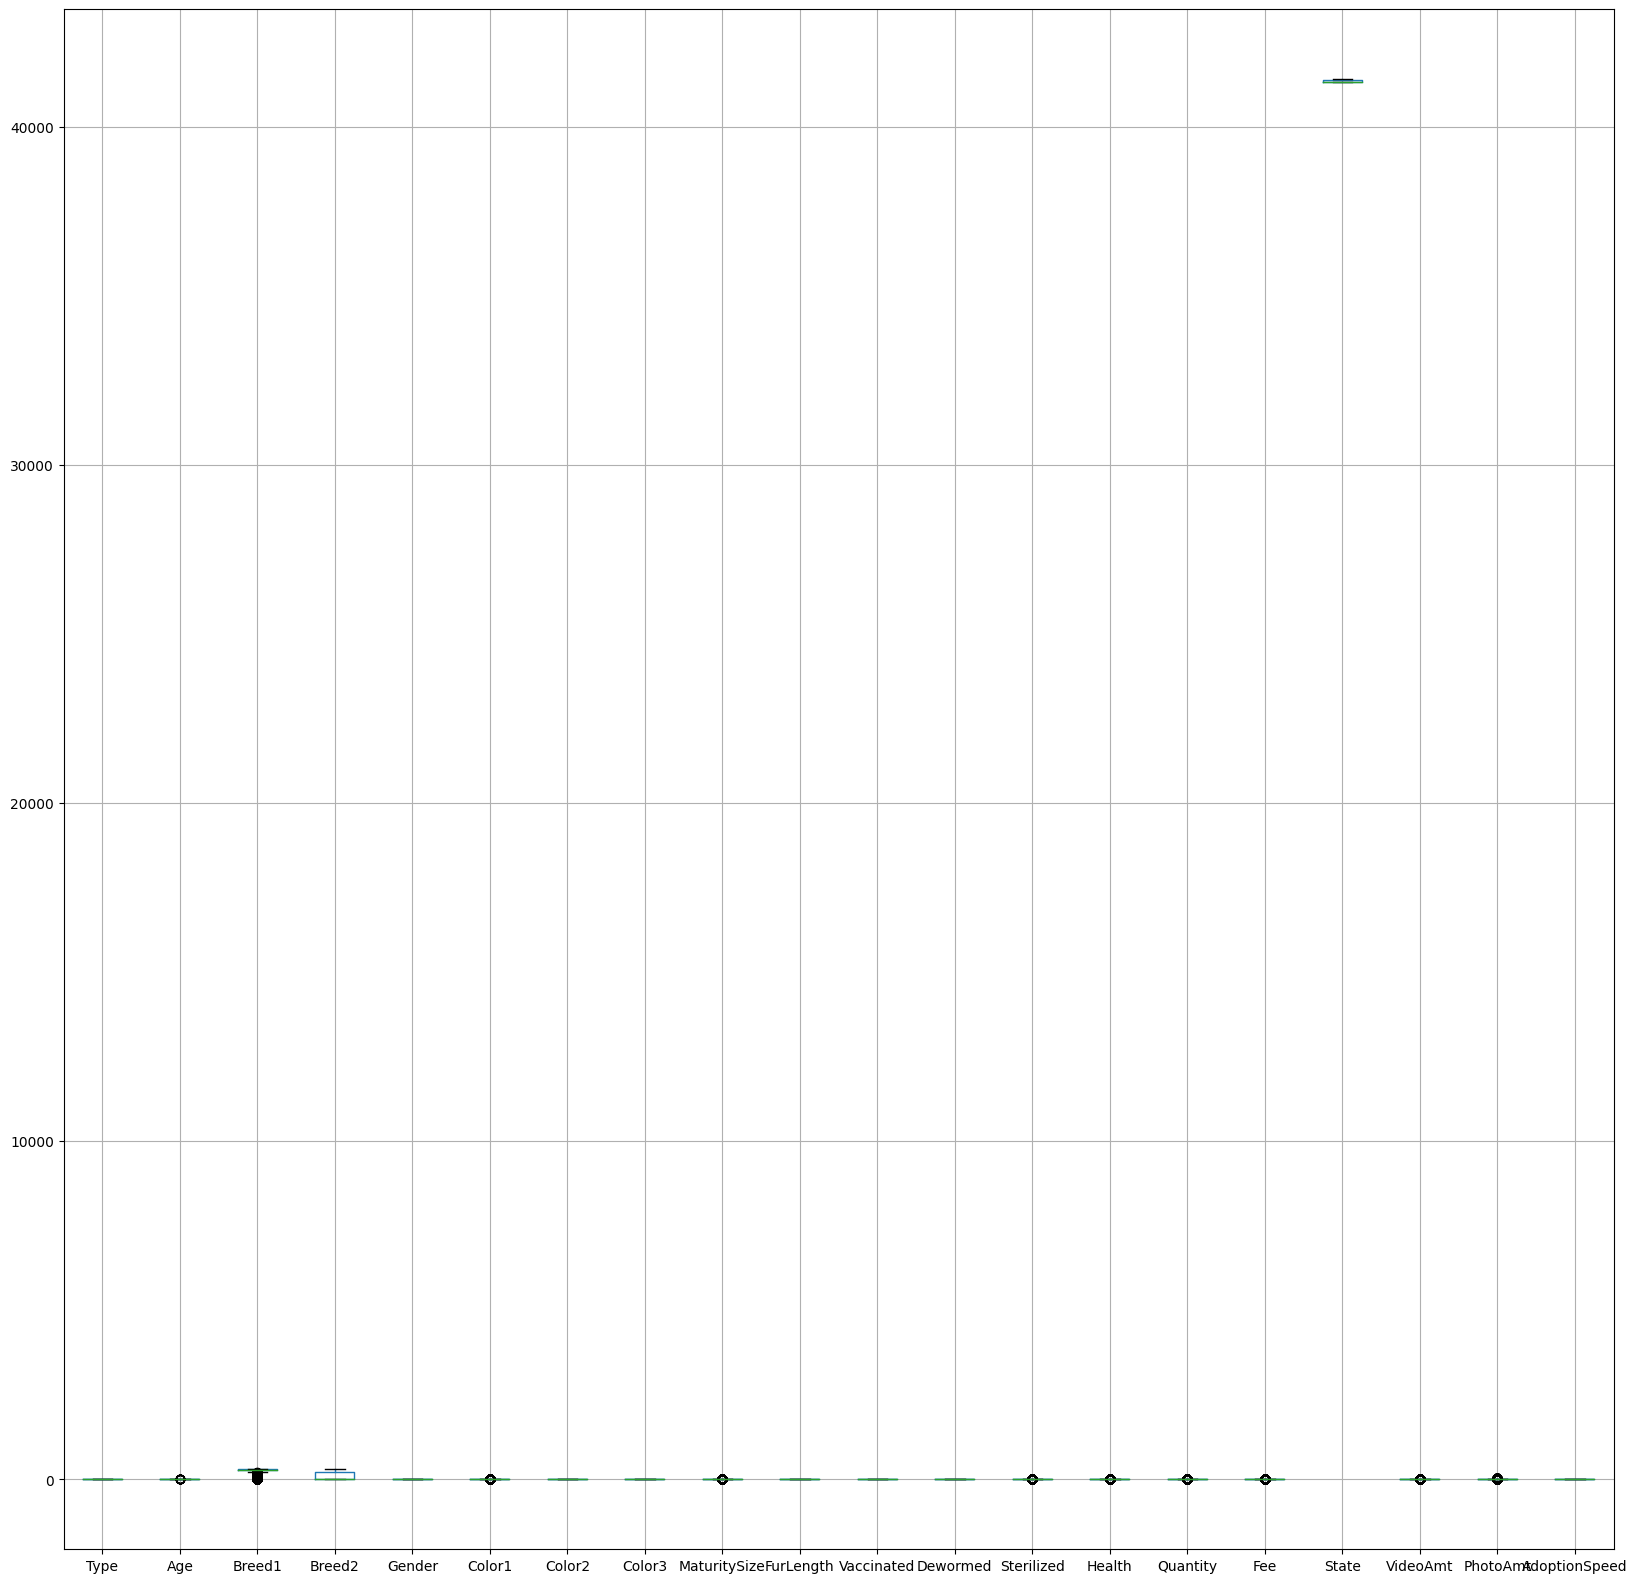

In [ ]:
# draw distribution plot for each feature corresponding to its boxplot to check for any outlier in all columns
# read the data
df = pd.read_csv('train_balanced_log.csv')

distruibution_plot = df.hist(figsize=(20,20), bins=50)
plt.show()
boxplot = df.boxplot(figsize=(20,20))
plt.show()


### Remove the uncorrelated variables (VideoAmt, PhotoAmt)

In [ ]:
# remove the uncorrelated features with the target variable (AdoptionSpeed) 

# read the data
df = pd.read_csv('train_balanced_log.csv')

# drop the uncorrelated features with the target variable (AdoptionSpeed)
df = df.drop(['VideoAmt', 'PhotoAmt'], axis=1)

# save the data into .csv files
df.to_csv('train_balanced_log_corr.csv', index=False)

### Remove names(Name) and unique values(PetID) because thay are distinct for the pet

In [ ]:
# Remove names(Name) and unique values(PetID) 
# read the data
df = pd.read_csv('train_balanced_log_corr.csv')

# drop the names(Name) and unique values(PetID)
df = df.drop(['Name', 'PetID'], axis=1)

# save the data into .csv files
df.to_csv('train_balanced_log_corr_drop.csv', index=False)

Since there are lots of outliers, we shall use PCA, to get the most important features instead of removing outliers because they could be of high correlation with the target variable

In [ ]:
# Use PCA to reduce the dimensionality of the data
# PCA is used to reduce the dimensionality of the data by projecting it onto a lower dimensional subspace

# read the data
df = pd.read_csv('train_balanced_log_corr_drop.csv')

# split the data into features(X) and target(y)
X, y = df.drop('AdoptionSpeed', axis=1), df['AdoptionSpeed']

# Exclude non-numeric columns
X = X.select_dtypes(exclude=['object'])

## Two ways to apply PCA :
# 1. apply PCA to keep 95% of the variance of the data
# pca = PCA(n_components=0.95)  

# 2. apply pca for certain number of components 
pca = PCA(n_components=10)

# fit PCA to the data
X = pca.fit_transform(X)

# combine the features and target into one dataframe
df = pd.concat([pd.DataFrame(X), y], axis=1)

# save the data into .csv files
df.to_csv('train_balanced_log_corr_pca.csv', index=False)
